In [1]:
pip install yfinance pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


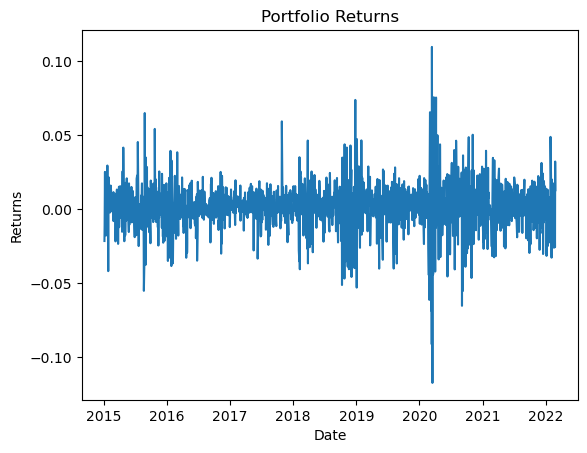

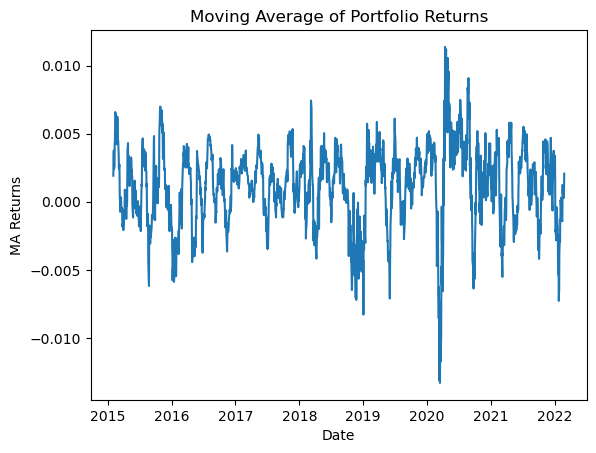

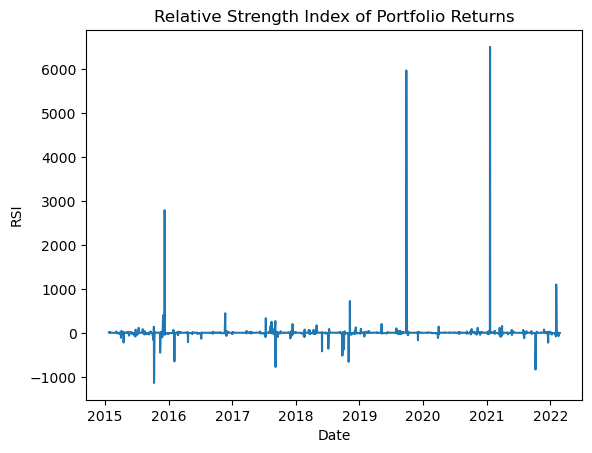

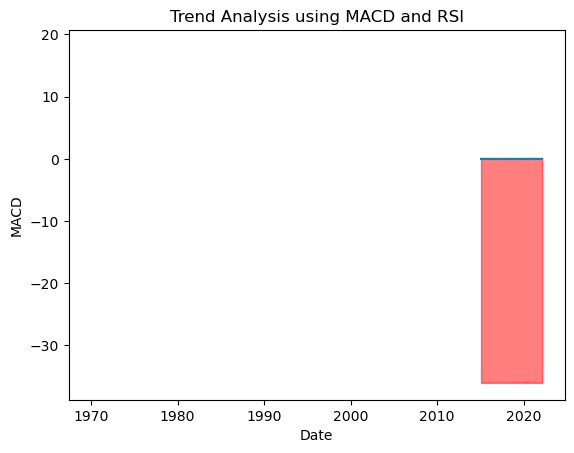

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the mutual fund tickers and their respective weights
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT']
weights = [0.3, 0.2, 0.2, 0.3]

# Download the historical data for each ticker
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start='2015-01-01', end='2022-02-26')['Adj Close']

# Create a portfolio dataframe with the weighted returns
portfolio = pd.DataFrame(index=data['AAPL'].index)
for ticker, weight in zip(tickers, weights):
    portfolio[ticker] = data[ticker] * weight
    portfolio['Portfolio'] = portfolio.sum(axis=1)

# Calculate the daily returns of the portfolio
portfolio_returns = portfolio['Portfolio'].pct_change()

# Plot the portfolio returns
plt.plot(portfolio_returns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Portfolio Returns')
plt.show()

# Calculate the moving average (MA) of the portfolio returns
ma_window = 20
portfolio_ma = portfolio_returns.rolling(window=ma_window).mean()

# Plot the MA of the portfolio returns
plt.plot(portfolio_ma)
plt.xlabel('Date')
plt.ylabel('MA Returns')
plt.title('Moving Average of Portfolio Returns')
plt.show()

# Calculate the relative strength index (RSI) of the portfolio returns
rsi_window = 14
rsi = portfolio_returns.rolling(window=rsi_window).std() / (portfolio_returns.rolling(window=rsi_window).mean())

# Plot the RSI of the portfolio returns
plt.plot(rsi)
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index of Portfolio Returns')
plt.show()

# Perform trend analysis using the MACD and RSI indicators
macd_signal = ma_window - 2
macd_histogram = (portfolio_ma - macd_signal) * 2

# Plot the MACD and RSI indicators
plt.plot(portfolio_ma)
plt.plot(macd_signal)
plt.fill_between(portfolio_ma.index, macd_histogram, where=(macd_histogram > 0), color='green', alpha=0.5)
plt.fill_between(portfolio_ma.index, macd_histogram, where=(macd_histogram < 0), color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('Trend Analysis using MACD and RSI')
plt.show()